# Using Matplotlib and scikit-learn to Generate a Map of Common Crime Areas in LA
For more information / tutorial see the blogpost: https://blog.jhmejia.com/2022/12/using-matplotlib-and-scikit-learn-to.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Read in the data from the CSV file
# df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# You can find the data here: https://catalog.data.gov/dataset/crime-data-from-2020-to-present
# You can also download the data directly from the API with this command:
df = pd.read_csv('https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD')


# Verify that the data was read in correctly
df.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

Pre-processing time 

In [4]:
# Remove all data where the 'Lat' or 'Lon' is 0
df = df[(df['LAT'] != 0) & (df['LON'] != 0)]

# Verify that the data was read in correctly
df.head()


NameError: name 'df' is not defined

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


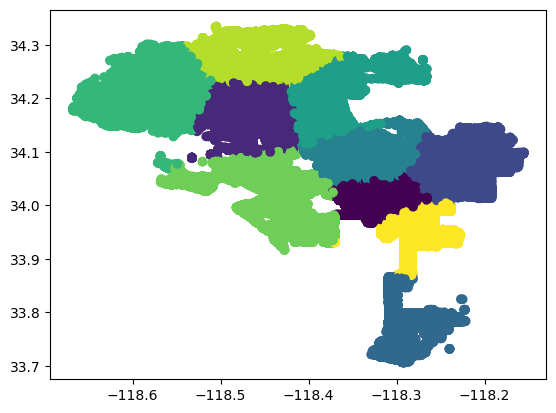

In [ ]:
# Do a KMeans clustering on the data
kmeans = KMeans(n_clusters=10, random_state=0).fit(df[['LAT', 'LON']])
df['cluster'] = kmeans.labels_


plt.scatter(df['LON'], df['LAT'], c=df['cluster'])
plt.show()

Now we are going to do the same thing but display it on a map with geopandas! Geopandas is an extremely useful tool which you can use to add geographic support to pandas objects. It also works on shapely. 

NameError: name 'plt' is not defined

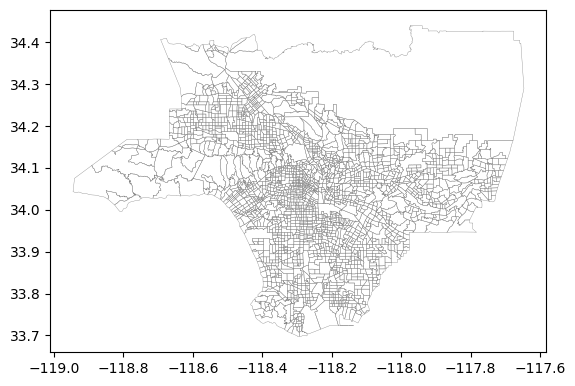

In [ ]:
import geopandas

# Read in the Census Tracts data from the shapefile, found here: https://geohub.lacity.org/datasets/lacounty::census-tracts-2020/explore
county = geopandas.read_file('census_tracts_info/Census_Tracts_2020.shx')

# Verify that the data was read in correctly
county.head()

#Remove the data that have CT20 == 599100 or 599000 (these are in the ocean)
county = county[county['CT20'] != '599100']
county = county[county['CT20'] != '599000']

#Remove the data whose geometry has a point with latitude of 34.4 or higher (this are outside of LA City)

county = county[county['geometry'].apply(lambda x: x.centroid.y < 34.4)]


# Plot the county map on same plot
county.xlabel = "lon"
county.ylabel = "lat"

county.boundary.plot(color="Gray", linewidth=.25)



# Plot the clusters on the county map
plt.scatter(df['LON'], df['LAT'], c=df['cluster'], alpha=0.5)
plt.figure(figsize=(100,100))
plt.show()


## Finding conclusions based on this data

In [ ]:
# Find the most common crime in each cluster
df.groupby('cluster')['Crm Cd Desc'].agg(pd.Series.mode)








cluster
0    VEHICLE - STOLEN
1    VEHICLE - STOLEN
2    VEHICLE - STOLEN
3            BURGLARY
4    VEHICLE - STOLEN
5    VEHICLE - STOLEN
6    VEHICLE - STOLEN
7    VEHICLE - STOLEN
8    VEHICLE - STOLEN
9    VEHICLE - STOLEN
Name: Crm Cd Desc, dtype: object

In [ ]:
# Find the average location of crimes in each cluster

df.groupby('cluster')[['LAT', 'LON']].mean()

# Print the number of crimes in each cluster, the most common crime, and the average location of crimes in each cluster

for i in range(10):
    print("Cluster ", i)
    print("Number of crimes: ", len(df[df['cluster'] == i]))
    print("Most common crime: ", df[df['cluster'] == i]['Crm Cd Desc'].mode()[0])
    print("Average location: ", df[df['cluster'] == i][['LAT', 'LON']].mean())
    print()

# Interestingly, Cluster 6 has a different most common crime than the other clusters. Cluster 6 is the Westside of the city to the Pacific Ocean (Basically the same as district 11 today!), which is a very wealthy neighborhood. 
# The most common crime in Cluster 6 is "Burglary Residential" which is an uncommon crime in the other clusters. 


Cluster  0
Number of crimes:  44164
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     34.173011
LON   -118.393792
dtype: float64

Cluster  1
Number of crimes:  84051
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     33.964210
LON   -118.281212
dtype: float64

Cluster  2
Number of crimes:  70922
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     34.090025
LON   -118.314621
dtype: float64

Cluster  3
Number of crimes:  57944
Most common crime:  BURGLARY
Average location:  LAT     34.010750
LON   -118.437925
dtype: float64

Cluster  4
Number of crimes:  26085
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     33.770976
LON   -118.285252
dtype: float64

Cluster  5
Number of crimes:  53408
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     34.209690
LON   -118.470313
dtype: float64

Cluster  6
Number of crimes:  38535
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     34.078858
LON   -118.209053
dtype: float64



This is a proposed LA City council district map. Our clusters are different than these, but you can see how they were clustered similarly to the map. 
You can see that just by clustering crime we were able to find important information about LA city that is similar to what the official city council made. 
<img src="current_la_counties.png" alt="current la counties" width="500"/>

As you can see, we have drawn some great conclusions from the data. I hope this serves as a good jumping off point for you to make your own clustering algorithms and serves as a good intro to pandas, geopandas, matplotlib, scikit-learn, and more. 